## Exploratory data analysis

In [187]:
import jsonlines
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import seaborn as sns
import numpy as np


### load dataset

In [150]:
data_image = []
with jsonlines.open('data/dataset.jsonl') as reader:
    data_image = list(reader)


In [151]:
data_image[0]

{'filename': '2009_004203.jpg',
 'folder': 'VOC2012',
 'object': [{'bndbox_xmax': 483,
   'bndbox_xmin': 23,
   'bndbox_ymax': 222,
   'bndbox_ymin': 113,
   'difficult': 0,
   'name': 'aeroplane',
   'occluded': '0',
   'pose': 'Right',
   'truncated': '0'}],
 'segmented': False,
 'size_depth': 3,
 'size_height': 333,
 'size_width': 500,
 'source_annotation': 'PASCAL VOC2009',
 'source_database': 'The VOC2009 Database',
 'source_image': 'flickr'}

In [152]:
def process(image):
    image['object_names'] = [o['name'] for o in image['object']]
    return image

data_image = [process(image) for image in data_image]
data_object = [obj for image in data_image for obj in image['object']]

In [153]:
df_image = pd.DataFrame(data_image)
df_object = pd.DataFrame(data_object)

In [154]:
df_image.head()

,filename,folder,object,segmented,size_depth,size_height,size_width,source_annotation,source_database,source_image,object_names
0,2009_004203.jpg,VOC2012,"[{'bndbox_xmax': 483, 'bndbox_xmin': 23, 'bndb...",False,3,333,500,PASCAL VOC2009,The VOC2009 Database,flickr,[aeroplane]
1,2011_004526.jpg,VOC2011,"[{'actions_jumping': '0', 'actions_other': '0'...",False,3,375,500,PASCAL VOC2011,The VOC2011 Database,flickr,"[person, person]"
2,2010_002177.jpg,VOC2012,"[{'bndbox_xmax': 342, 'bndbox_xmin': 1, 'bndbo...",False,3,500,437,PASCAL VOC2010,The VOC2010 Database,flickr,[cat]
3,2011_001252.jpg,VOC2012,"[{'bndbox_xmax': 190, 'bndbox_xmin': 125, 'bnd...",False,3,500,283,PASCAL VOC2011,The VOC2011 Database,flickr,"[boat, boat, boat]"
4,2011_002627.jpg,VOC2012,"[{'bndbox_xmax': 375, 'bndbox_xmin': 1, 'bndbo...",False,3,500,375,PASCAL VOC2011,The VOC2011 Database,flickr,[person]


In [155]:
df_object.head()

,bndbox_xmax,bndbox_xmin,bndbox_ymax,bndbox_ymin,difficult,name,occluded,pose,truncated,actions_jumping,...,actions_reading,actions_ridingbike,actions_ridinghorse,actions_running,actions_takingphoto,actions_usingcomputer,actions_walking,point_x,point_y,part
0,483,23,222,113,0,aeroplane,0,Right,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500,237,375,185,0,person,NaN,Unspecified,NaN,0,...,0,0,0,0,0,1,0,432,316,NaN
2,233,185,155,67,0,person,NaN,Unspecified,NaN,0,...,0,0,0,0,0,1,0,214,112,NaN
3,342,1,393,1,0,cat,0,Frontal,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,190,125,281,23,0,boat,0,Rear,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### basic analysis

Number of images and objects

In [156]:
len(df_image)

17125

In [157]:
len(df_object)

40138

Only 2913 images have segmentation data

In [158]:
df_image['segmented'].sum()

np.int64(2913)

Everything is a jpeg

In [159]:
df_image['filename'].str.lower().str.endswith('.jpg').sum()

np.int64(17125)

All images are from flickr

In [160]:
df_image.value_counts('source_image')

source_image
flickr    17125
Name: count, dtype: int64

list of data sources

In [161]:
df_image.value_counts('source_annotation')

source_annotation
PASCAL VOC2008    4340
PASCAL VOC2011    3640
PASCAL VOC2010    3503
PASCAL VOC2009    2722
PASCAL VOC2012    2164
PASCAL VOC2007     756
Name: count, dtype: int64

### Filter out non-segmented images

In [162]:
data_image = [image for image in data_image if image['segmented']]
data_object = [obj for image in data_image for obj in image['object']]

In [163]:
df_image = pd.DataFrame(data_image)
df_object = pd.DataFrame(data_object)

In [164]:
len(df_image), len(df_object)

(2913, 6934)

VOC2012 doesn't have segmentations

In [165]:
df_image.value_counts('source_annotation')

source_annotation
PASCAL VOC2008    639
PASCAL VOC2010    634
PASCAL VOC2007    632
PASCAL VOC2009    618
PASCAL VOC2011    390
Name: count, dtype: int64

Most common object is person

In [166]:
df_object.value_counts('name')

name
person         1734
chair           549
car             458
bottle          358
pottedplant     322
sheep           308
dog             299
cat             286
cow             284
bird            277
bus             237
boat            232
aeroplane       220
sofa            209
motorbike       204
horse           204
tvmonitor       199
bicycle         197
train           189
diningtable     168
Name: count, dtype: int64

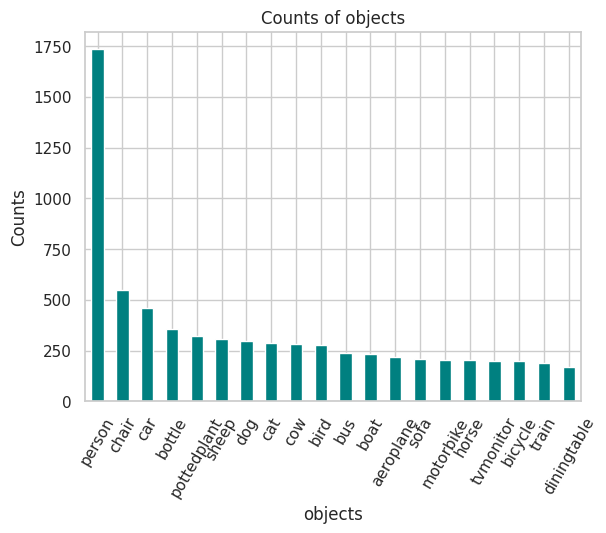

In [167]:
df_object.value_counts('name').plot(kind='bar', color='teal')

plt.xlabel('objects')
plt.ylabel('Counts')
plt.title('Counts of objects')

plt.xticks(rotation=60)
plt.show()

In [168]:
df_object.value_counts('name').describe()

count      20.000000
mean      346.700000
std       340.035463
min       168.000000
25%       204.000000
50%       257.000000
75%       311.500000
max      1734.000000
Name: count, dtype: float64

We saw previously that there was 2913 images and 6934 objects, but let's see the distribution of them

In [169]:
df_image['object'].apply(len).describe()

count    2913.000000
mean        2.380364
std         2.224563
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        38.000000
Name: object, dtype: float64

We can see that every image has at least one object

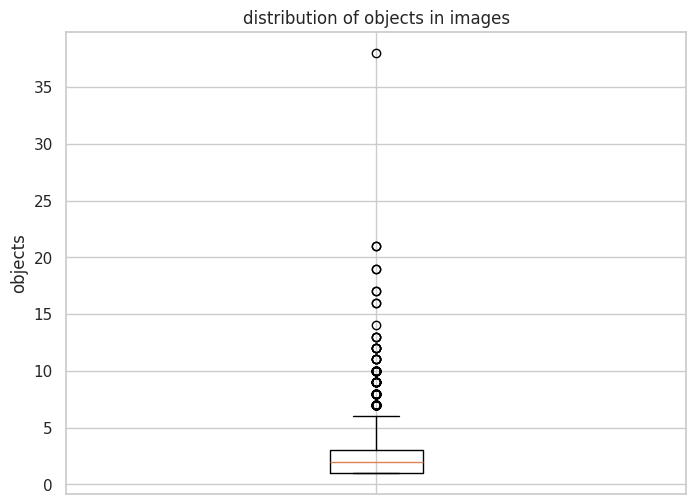

In [170]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_image['object'].apply(len))
plt.title('distribution of objects in images')
plt.ylabel('objects')
plt.xticks([1], [''])
plt.show()

Let's see that outlier now

In [171]:
max_value = df_image['object'].apply(len).max()
outlier_image = df_image[df_image['object'].apply(len) == max_value]
outlier_image

,filename,folder,object,segmented,size_depth,size_height,size_width,source_annotation,source_database,source_image,object_names
1030,2011_002920.jpg,VOC2012,"[{'bndbox_xmax': 336, 'bndbox_xmin': 232, 'bnd...",True,3,374,500,PASCAL VOC2011,The VOC2011 Database,flickr,"[bottle, person, person, bottle, bottle, bottl..."


In [172]:
pd.Series(outlier_image['object_names'].values[0]).value_counts()

bottle         34
person          3
diningtable     1
Name: count, dtype: int64

Let's see what that looks like

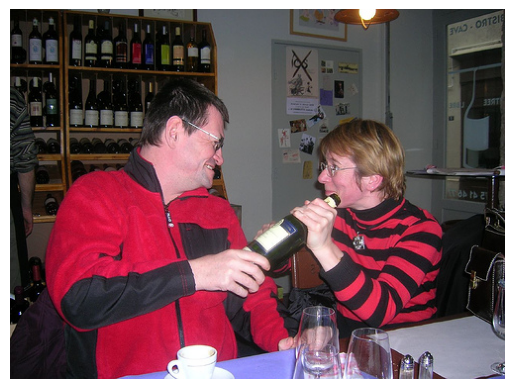

In [173]:
image_path = 'data/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/JPEGImages/'+outlier_image['filename'].values[0]

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

Now with bounding boxes

In [174]:
def plot_image_with_segments(image, segments):
    fig, ax = plt.subplots(1) 
    ax.imshow(image)

    for segment in segments:
        xmin = segment['bndbox_xmin']
        xmax = segment['bndbox_xmax']
        ymin = segment['bndbox_ymin']
        ymax = segment['bndbox_ymax']
        label = segment['name']

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none', alpha=0.3)

        ax.add_patch(rect)
        ax.text(xmin, ymin, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.3))

    plt.axis('off')
    plt.show()

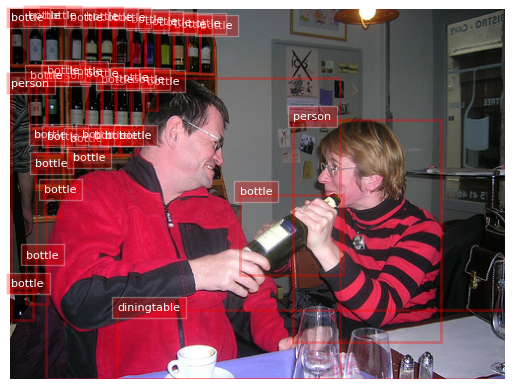

In [175]:
segmentation_data = outlier_image['object'].values[0]
plot_image_with_segments(img, segmentation_data)

There is also difficulty information

In [176]:
df_object['difficult'].value_counts()

difficult
0    6087
1     847
Name: count, dtype: int64

In [183]:
df_object['name'].value_counts()

name
person         1734
chair           549
car             458
bottle          358
pottedplant     322
sheep           308
dog             299
cat             286
cow             284
bird            277
bus             237
boat            232
aeroplane       220
sofa            209
horse           204
motorbike       204
tvmonitor       199
bicycle         197
train           189
diningtable     168
Name: count, dtype: int64

In [182]:
df_object[df_object['difficult'] == 1]['name'].value_counts()

name
person         238
chair          122
car             91
sofa            58
sheep           53
diningtable     48
pottedplant     45
cow             41
bottle          36
boat            19
bicycle         19
bus             17
aeroplane       16
tvmonitor       15
bird            10
horse            6
train            6
motorbike        3
dog              3
cat              1
Name: count, dtype: int64

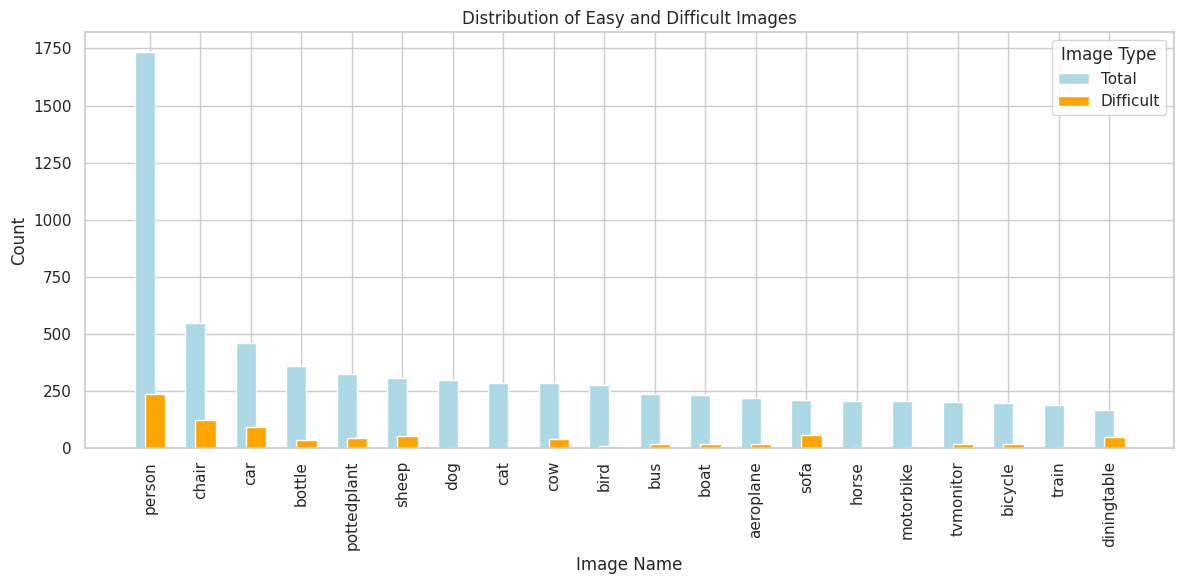

In [189]:
total_counts = df_object['name'].value_counts()
difficult_counts = df_object[df_object['difficult'] == 1]['name'].value_counts()

plot_data = pd.DataFrame({
    'Total': total_counts,
    'Difficult': difficult_counts.reindex(total_counts.index, fill_value=0)
})

plot_data.reset_index(inplace=True)
plot_data.columns = ['Image Name', 'Total', 'Difficult']

plt.figure(figsize=(12, 6))

bar_width = 0.4
index = np.arange(len(plot_data['Image Name']))

plt.bar(index, plot_data['Total'], width=bar_width, label='Total', color='lightblue')

plt.bar(index + (bar_width / 2), plot_data['Difficult'], width=bar_width, label='Difficult', color='orange')

plt.xticks(index + (bar_width / 4), plot_data['Image Name'], rotation=90)
plt.title('Distribution of Easy and Difficult Images')
plt.xlabel('Image Name')
plt.ylabel('Count')
plt.legend(title='Image Type')
plt.tight_layout()
plt.show()


All animals are easy but some are easier than others.